In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv('titanic_train.xls')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

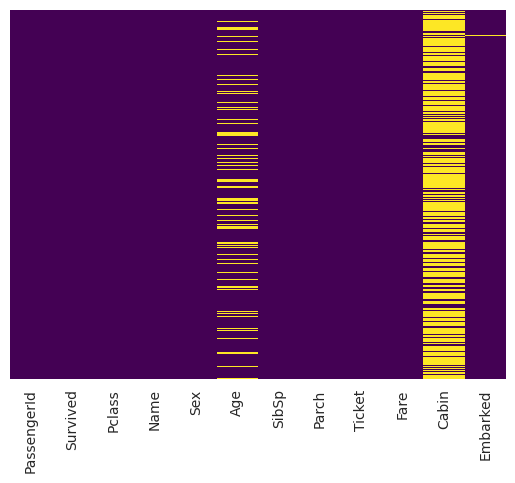

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

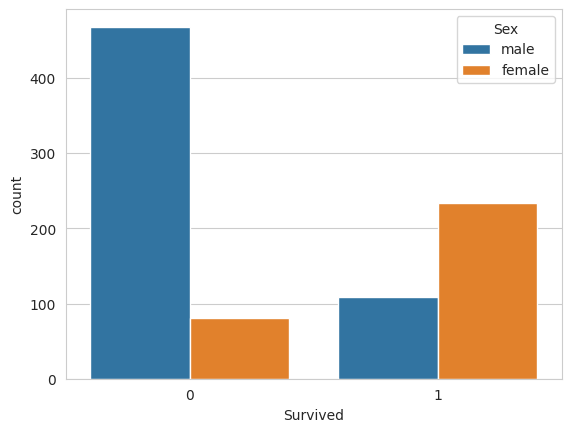

In [ ]:
# How many passengers have survived, show graphically
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

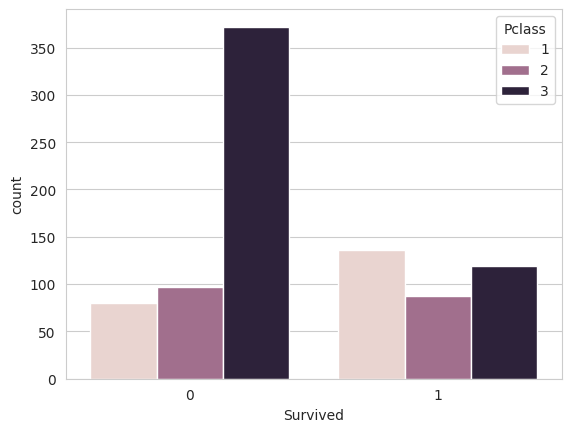

In [ ]:
# How many passengers have survived, show graphically
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Pclass')

<Axes: xlabel='SibSp', ylabel='count'>

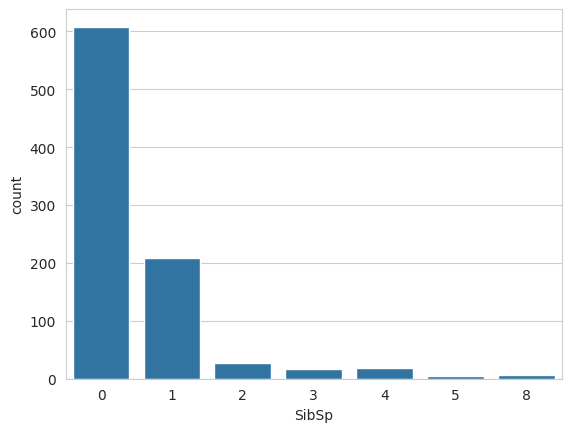

In [ ]:
sns.countplot(x='SibSp', data=titanic)

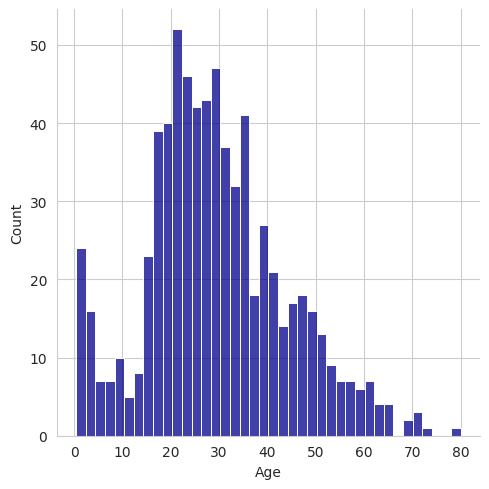

In [ ]:
sns.displot(titanic['Age'].dropna(), kde=False, color='darkblue', bins=40)

<Axes: xlabel='Survived', ylabel='count'>

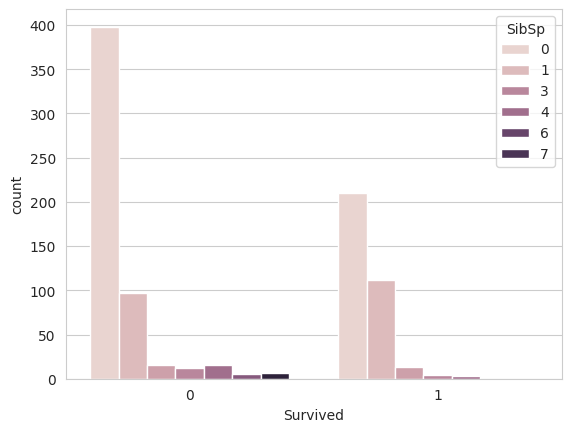

In [ ]:
sns.countplot(x='Survived',hue='SibSp',data=titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

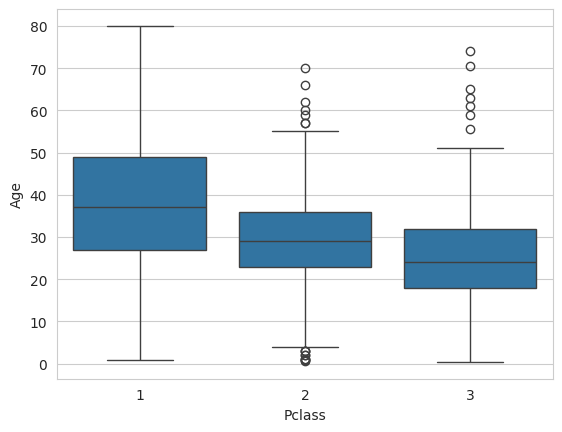

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [ ]:
def age_replacement(col):
  Age=col[0] #0th location column ---> Age
  Pclass=col[1] #1st location column ---> Pclass
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
titanic['Age']=titanic[['Age','Pclass']].apply(age_replacement, axis=1)

/tmp/ipython-input-22946832.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=col[0] #0th location column ---> Age
/tmp/ipython-input-22946832.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=col[1] #1st location column ---> Pclass


In [ ]:
titanic['Age'].isnull().sum()

np.int64(0)

<Axes: >

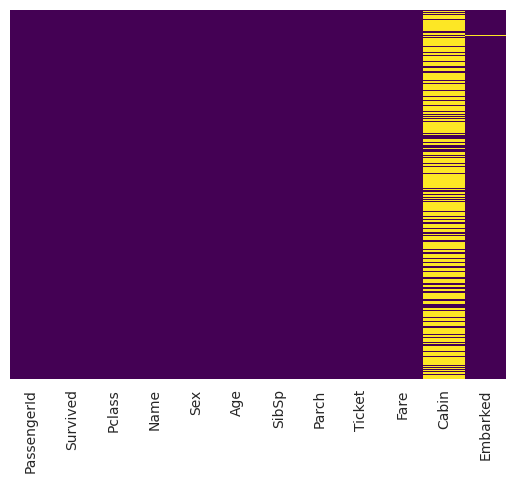

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
titanic.drop(['Name','Ticket'], axis=1, inplace=True)

In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic.dropna(inplace=True)

In [ ]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True).astype(int)
embark=pd.get_dummies(titanic['Embarked'], drop_first=True).astype(int)


In [ ]:
titanic.drop(['Sex','Embarked'], axis=1, inplace=True)

In [ ]:
titanic=pd.concat([titanic, sex, embark], axis=1)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,D35,0,0,1
872,873,0,1,33.0,0,0,5.0000,B51 B53 B55,1,0,1
879,880,1,1,56.0,0,1,83.1583,C50,0,0,0
887,888,1,1,19.0,0,0,30.0000,B42,0,0,1


In [ ]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,D35,0,0,1
872,873,0,1,33.0,0,0,5.0000,B51 B53 B55,1,0,1
879,880,1,1,56.0,0,1,83.1583,C50,0,0,0
887,888,1,1,19.0,0,0,30.0000,B42,0,0,1


In [ ]:
#Machine Learning
"""
1. Supervised ---> labels given along with features(Input -> Output)
   i. Regression ---> Relationship between Independent and Dependent variables / Continuous Output
         i. Linear Regression
            -Simple Linear Regression - One Input feature
                y = mX + C
            -Multilinear Regression - More than one input feature
                y = m1X1 + m2X2 + m3X3 +...mnXn + avg(C)
         ii. Non-Linear or Polynomial Regression

   ii. Classification ---> Discrete Output

2. Unsupervised ---> labels not given along with features(Input Only)
   i. Clustering ---> Grouping of similar data points
   ii. Association ---> Finding relationship between variables
   iii. Anomaly Detection ---> Outliers
   iv. Dimensionality Reduction ---> Reducing the number of features
   v. Density Estimation ---> Estimating the probability density function
   vi. Generative Models ---> Generating new data points

3. Reinforcement ---> SELF-LEARNING ALGO* labels not given along with features(Input)

4. Semi-Supervise ---> Mixture of Unsupervise 70% and Supervise 30%
"""

'\n1. Supervised ---> labels given along with features(Input -> Output)\n   i. Regression ---> Continuous Output\n   ii. Classification ---> Discrete Output\n\n2. Unsupervised ---> labels not given along with features(Input Only)\n   i. Clustering ---> Grouping of similar data points\n   ii. Association ---> Finding relationship between variables\n   iii. Anomaly Detection ---> Outliers\n   iv. Dimensionality Reduction ---> Reducing the number of features\n   v. Density Estimation ---> Estimating the probability density function\n   vi. Generative Models ---> Generating new data points\n\n3. Reinforcement ---> SELF-LEARNING ALGO* labels not given along with features(Input)\n\n4. Semi-Supervise ---> Mixture of Unsupervise 70% and Supervise 30%\n'

In [ ]:
### Regression ---> Relationship between Input and Output features
- output feature should be continous in nature
-

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Salary_Data.csv')
data.head(5)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
### Multicorrlinearity
data.corr(numeric_only=True)

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x = data[['YearsExperience', 'Age']]
y = data['Salary'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
### Build Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, pred)

print('Mean Absolute Error: {}'.format(mae))
print('Mean Squared Error: {}'.format(mse))
print('Root Mean Squared Error: {}'.format(rmse))
print('R2-squared: {}'.format(r2))

Mean Absolute Error: 4031.0716932661844
Mean Squared Error: 21251940.86095632
Root Mean Squared Error: 4609.982739767723
R2-squared: 0.9744893635696935


In [ ]:
metrics.r2_score(lr.predict(X_train), y_train)

0.941113317921954

In [ ]:
yoe = float(input('Years of Exp: '))
age = int(input('Enter your age: '))

sal = lr.predict(sc.transform([[yoe, age]]))
print('Predicted Salary: ',sal[0])

Years of Exp: 0
Enter your age: 23
Predicted Salary:  [39334.61950039]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Polynomial Regression***

In [ ]:
df = pd.read_csv('Position Salary.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


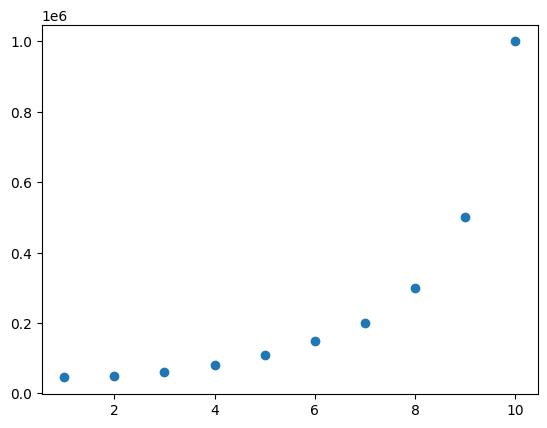

In [ ]:
plt.scatter(df['Level'], df['Salary'])
plt.show()

In [ ]:
X = df[['Level']]
y = df['Salary']

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
pred = lr.predict(X)
pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

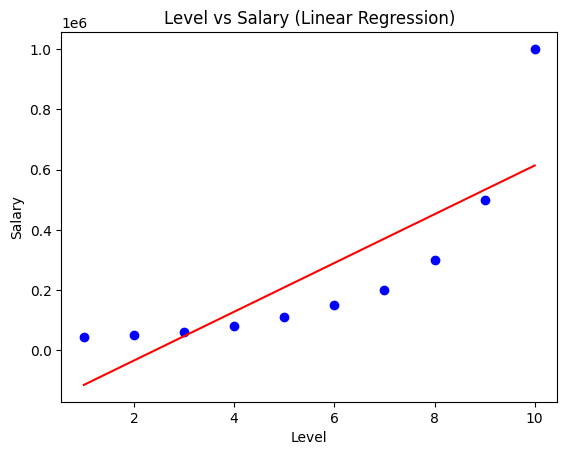

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y, pred)
mae

128454.54545454546

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train=poly.fit_transform(X)
X_train

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
lr_new = LinearRegression()
lr_new.fit(X_train, y)

LinearRegression()

In [ ]:
X_pred=lr_new.predict(X_train)

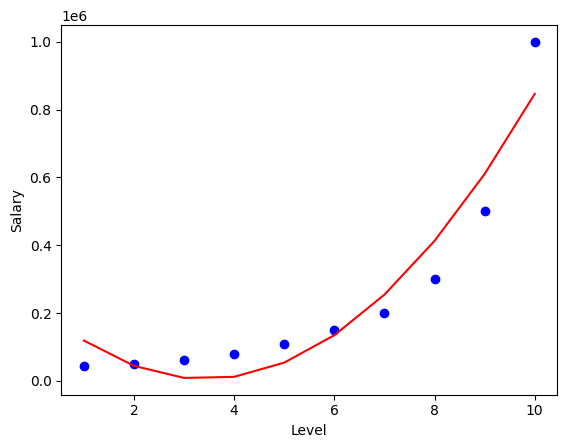

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, X_pred, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
### Cllassification
"""
-Output should be in Categorical nature: 1,2,3/yes,no/good,better,best

-Binary class classification: yes,no/0,1/good,bad
      -Logistic Regression

-Multi class classification: 1,2,3/good,better,best
      -SVM
      -Decision Tree
      -Random Forest
      -KNN
      -Naive Baye's
-LINEAR MODEL
   -Logistic Regression
   -SVM

In [ ]:
### Logistic Regression
- y=mx+c / y=m1x1 + m2x2+c
- p=1/(1+e^−y)     "Turning Regression function into Sigmoid, converts int probability"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data=sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df = data[data['species']!='setosa'].copy() # Keep the 'species' column
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
new_df = pd.get_dummies(df, columns=['species'], drop_first=True).astype(int)
new_df

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7,3,4,1,0
51,6,3,4,1,0
52,6,3,4,1,0
53,5,2,4,1,0
54,6,2,4,1,0
...,...,...,...,...,...
145,6,3,5,2,1
146,6,2,5,1,1
147,6,3,5,2,1
148,6,3,5,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X = new_df.drop('species_virginica', axis=1)
y = new_df['species_virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

pred=logmodel.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, logmodel.predict(X_test)))


[[14  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



In [ ]:
accuracy_score(y_test,pred)
precision_score(y_test, pred)
recall_score(y_test, pred)
f1_score(y_test, pred)

0.8947368421052632

In [ ]:
# Confusion Matrix
- Accuracy   (TP+TN)/(TP+TN+FP+FN)

- Error      (FP+FN)/(FP+FN+TP+TN) OR {1-Accuracy}

- Precision  (TP)/(TP+FP)  | # Reducing FP  ---> Email Detection System
                           ----> F1 Score = 2*(Recall * Precision) / (Recall + Precision) | # When Employee & Employere both are affected
- Recall     (TP)/(TP+FN)  | # Reucing FN   ---> Health Prediction System

In [ ]:
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data['species']=data['species'].map({'setosa':0,
                                     'versicolor':1,
                                     'virginica':2})

In [ ]:
data['species'].unique()

array([0, 1, 2])

In [ ]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['species']=lb.fit_transform(data['species'])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('species', axis=1) # X = data.iloc[:,:-1]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
train_pred = svc.predict(X_train)
test_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(test_pred, y_test))
print(confusion_matrix(y_test, test_pred))
print(accuracy_score(test_pred, y_test))
print(accuracy_score(train_pred, y_train))
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
0.9777777777777777
0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.97      0.95        29
           2       0.97      0.95      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [ ]:
#Creating a py file in jupyter/colab
%%writefile web_app.py
import streamlit as st
st.title("Let's create")
st.write('Hello Streamlit')

file = st.file_uploader('Upload your file', type=['cvs'])
if file:
  df = pd.read_csv(file)
  st.write('Here is your data', df.head())
  col=st.selectbox('Select column from here', df.columns)
  st.write('Selected Columns: ',df[col])

  fig,ax=plt.subplots(figsize=(10,5))
  df[col].value_counts().plot(kind='bar',ax=ax)
  st.pyplot(fig)

Overwriting web_app.py


In [ ]:
!streamlit run web_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.79.28:8501

  Stopping...


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.9 MB/s eta 0:00:00


In [ ]:
#Decision Tree


In [ ]:
%%writefile iris.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()
species=data['target_names']

model=pickle.load('model.pkl','rb') # rb---> read in binary as it was made in binary


st.title('Iris Flower Species Prediction')
st.write('Enter the flowers input features: ')

sepal_length=st.number_input('Sepal Length(cm): ',min_value=0.0, max_value=10.0)
sepal_width=st.number_input('Sepal Width(cm): ',min_value=0.0, max_value=10.0)
petal_length=st.number_input('Petal Length(cm): ',min_value=0.0, max_value=10.0)
petal_width=st.number_input('Petal Width(cm): ',min_value=0.0, max_value=10.0)

if st.button('Predict'):
  feat=np.array([[sepal_length,sepal_width,petal_length,petal_width]])
  pred=model.predict(feat)
  if pred[0]==0:
    st.success('The Flower Species is: {}'.format(species[pred[0]]))



Overwriting iris.py


In [ ]:
!streamlit run iris.py


/bin/bash: line 1: streamlit: command not found
